# <font color=blue>Bike Sharing Assignment</font>
### <font color=green>By: Purva Choudhry</font>
#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their
revenues. They have contracted a consulting company to understand the factors on which
the demand for these shared bikes depends. Specifically, they want to understand the
factors affecting the demand for these shared bikes in the American market. The company
wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

> ## **Data Understanding and Cleaning**

 - #### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import calendar
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

 - #### Reading the  data file in *bike_sharing* dataframe

In [2]:
bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 - #### Finding the number of observations present in bike_sharing.

In [3]:
bike_sharing.shape

(730, 16)

 - #### Finding the information of all the coloumns.

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 - #### Identify the categorical and continuous features.
- **Categorical features:** season, yr, mnth, holiday, weekday, workingday, weathersit
- **Continuous features:** temp, atemp, hum, windspeed

In [5]:
categorical_features = ['season', 'yr','mnth','holiday', 'weekday', 'workingday', 'weathersit']
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

 - #### Changing data type of categorical variable from **integer** type to **category** type.

In [6]:
for col in categorical_features:
    bike_sharing[col] = bike_sharing[col].astype('category')

 - #### Changing labels of categorical variable from data dictionary.

In [7]:
bike_sharing['yr'] = bike_sharing['yr'].map({0: '2018', 1:'2019'})
bike_sharing['holiday'] = bike_sharing['holiday'].map({0: 'not_a_holiday', 1:'a_holiday'})
bike_sharing['workingday'] = bike_sharing['workingday'].map({0: 'not_a_workingday', 1:'a_workingday'})
bike_sharing['season'] = bike_sharing['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x : calendar.month_abbr[x])
bike_sharing['weekday'] = bike_sharing['weekday'].apply(lambda x : calendar.day_abbr[x])
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'})

- **Dropping the variables** 'instant', 'dteday', 'casual', 'registered' as these variables are not significant for our analysis.

In [8]:
bike_sharing = bike_sharing.drop(['instant','dteday','casual', 'registered'], axis=1)

- #### Describing the dataframe to get a high level understanding of data.

In [9]:
bike_sharing.describe(include = 'all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730,730,730,730,730,730,730,730.000000,730.000000,730.000000,730.000000,730.000000
unique,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN
top,Fall,2019,Dec,not_a_holiday,Sun,a_workingday,Clear,NaN,NaN,NaN,NaN,NaN
freq,188,365,62,709,105,499,463,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.319259,23.726322,62.765175,12.763620,4508.006849
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.506729,8.150308,14.237589,5.195841,1936.011647
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.880615,30.445775,72.989575,15.625589,5966.000000


- #### Finding the missing value.

In [10]:
bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There is no missing value

> ## **Visualising the Data**

- Performing EDA to understand various variables.
- Checking correlation between the variables.

- #### Importing the Libraries Required for plotting graphs.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

- #### Visualising Categorical Variables

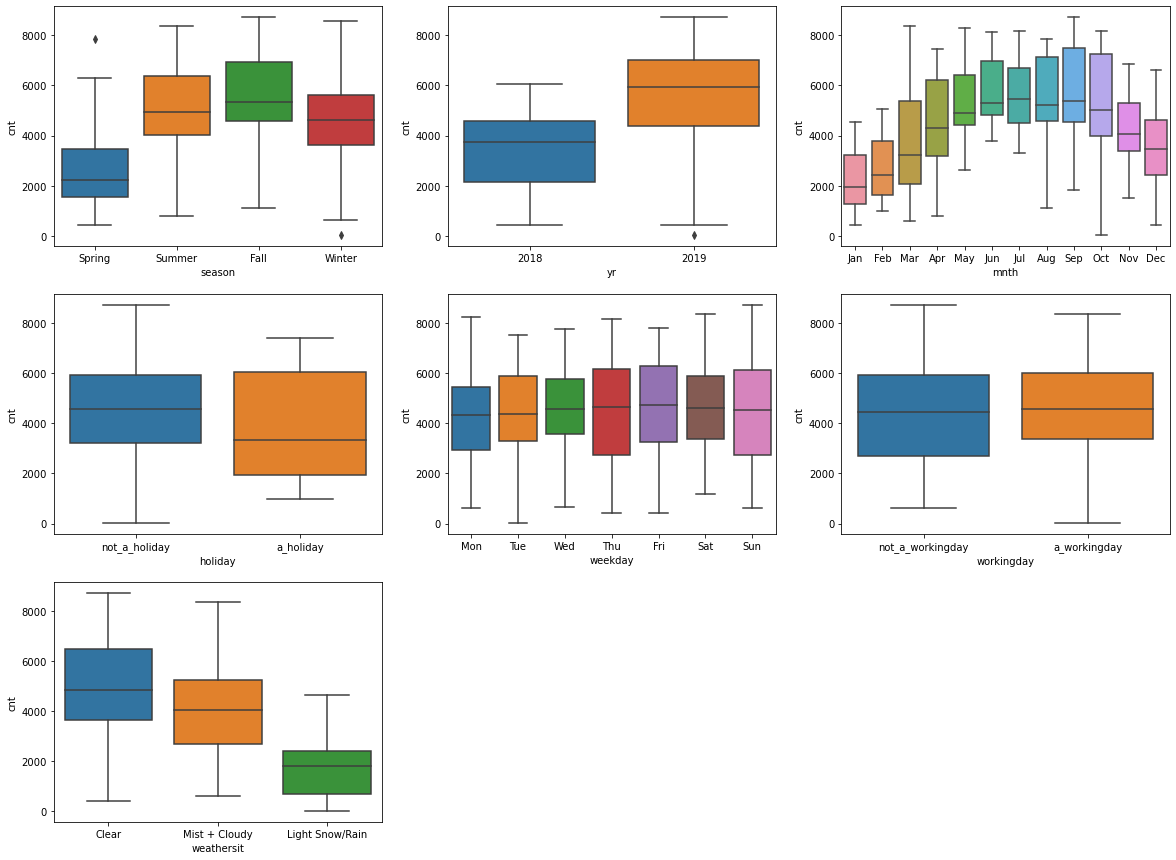

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

- There is high chance of more demand in clear weather situation and in year 2019.
- There is high chance of low demand in fall season.

- #### Visualising Continuous Variables

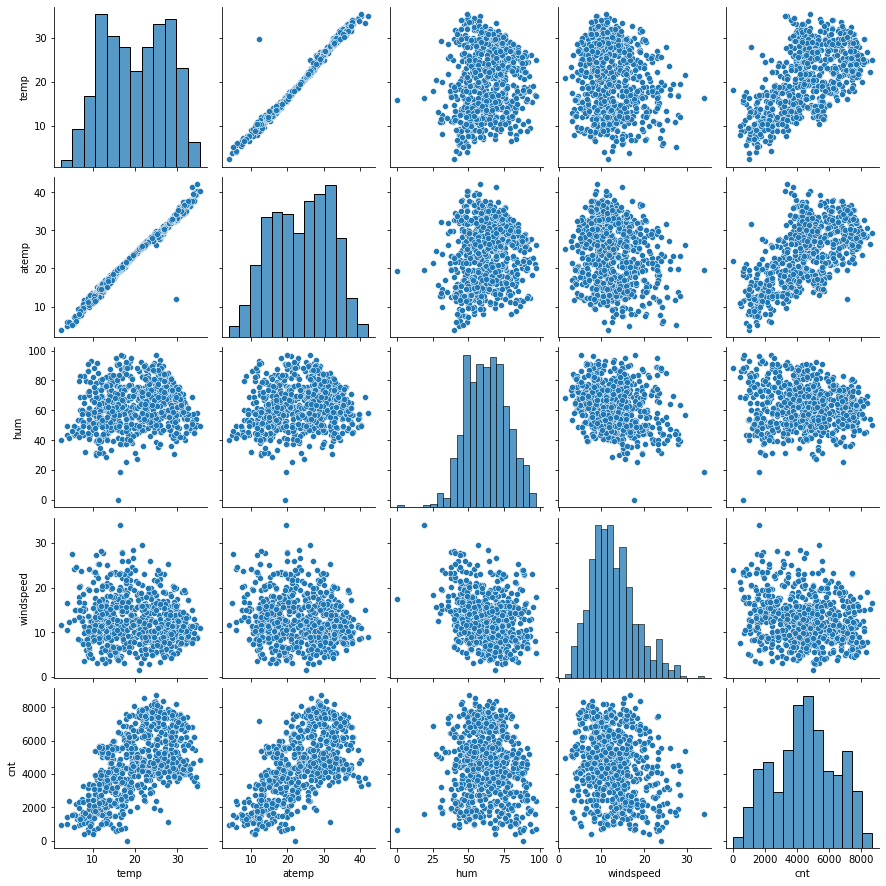

In [13]:
sns.pairplot(bike_sharing)
plt.show()

- We can see strong positive correlation between **temp** and **atemp** so we can drop one of them.
- **cnt** and **temp** has positive correlation. Similarily, **atemp** also has positive correlation with **cnt**.

In [14]:
#Let's drop 'temp' as temp and atemp are correlated.
bike_sharing = bike_sharing.drop(['temp',], axis=1)

> ## **Data Preparation**

### Dummy Variables

All the categorical variables have multiple levels. We need to convert these levels into integer as well.

In [15]:
dummy = pd.get_dummies(bike_sharing[categorical_features], drop_first = True) 

In [16]:
# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, dummy], axis = 1)

In [17]:
# Droping  'season','mnth','weekday','weathersit' as we have created the dummies for it
bike_sharing.drop(categorical_features, axis = 1, inplace = True)

In [18]:
# Now let's see the head of our dataframe.
bike_sharing.head()

,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,yr_2019,mnth_Feb,mnth_Mar,...,holiday_a_holiday,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,workingday_a_workingday,weathersit_Mist + Cloudy,weathersit_Light Snow/Rain
0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

we are using Standardisation.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,yr_2019,mnth_Feb,mnth_Mar,...,holiday_a_holiday,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,workingday_a_workingday,weathersit_Mist + Cloudy,weathersit_Light Snow/Rain
653,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1.194106,0.516433,-0.330615,1.399629,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,-0.348834,-0.069854,-0.385694,-0.215554,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,-1.473492,-1.045032,2.018143,-1.379511,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,-0.571474,-1.000840,-0.779889,-0.136589,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [23]:
df_train.describe()

,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,yr_2019,mnth_Feb,mnth_Mar,...,holiday_a_holiday,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,workingday_a_workingday,weathersit_Mist + Cloudy,weathersit_Light Snow/Rain
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4.231909e-16,-3.831358e-16,-2.542628e-16,-5.224579e-17,0.245098,0.262745,0.24902,0.507843,0.066667,0.098039,...,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.343137,0.029412
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,0.43287,0.500429,0.249689,0.297660,...,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.475223,0.169124
min,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- #### Let's check the correlation coefficients to see which variables are highly correlated

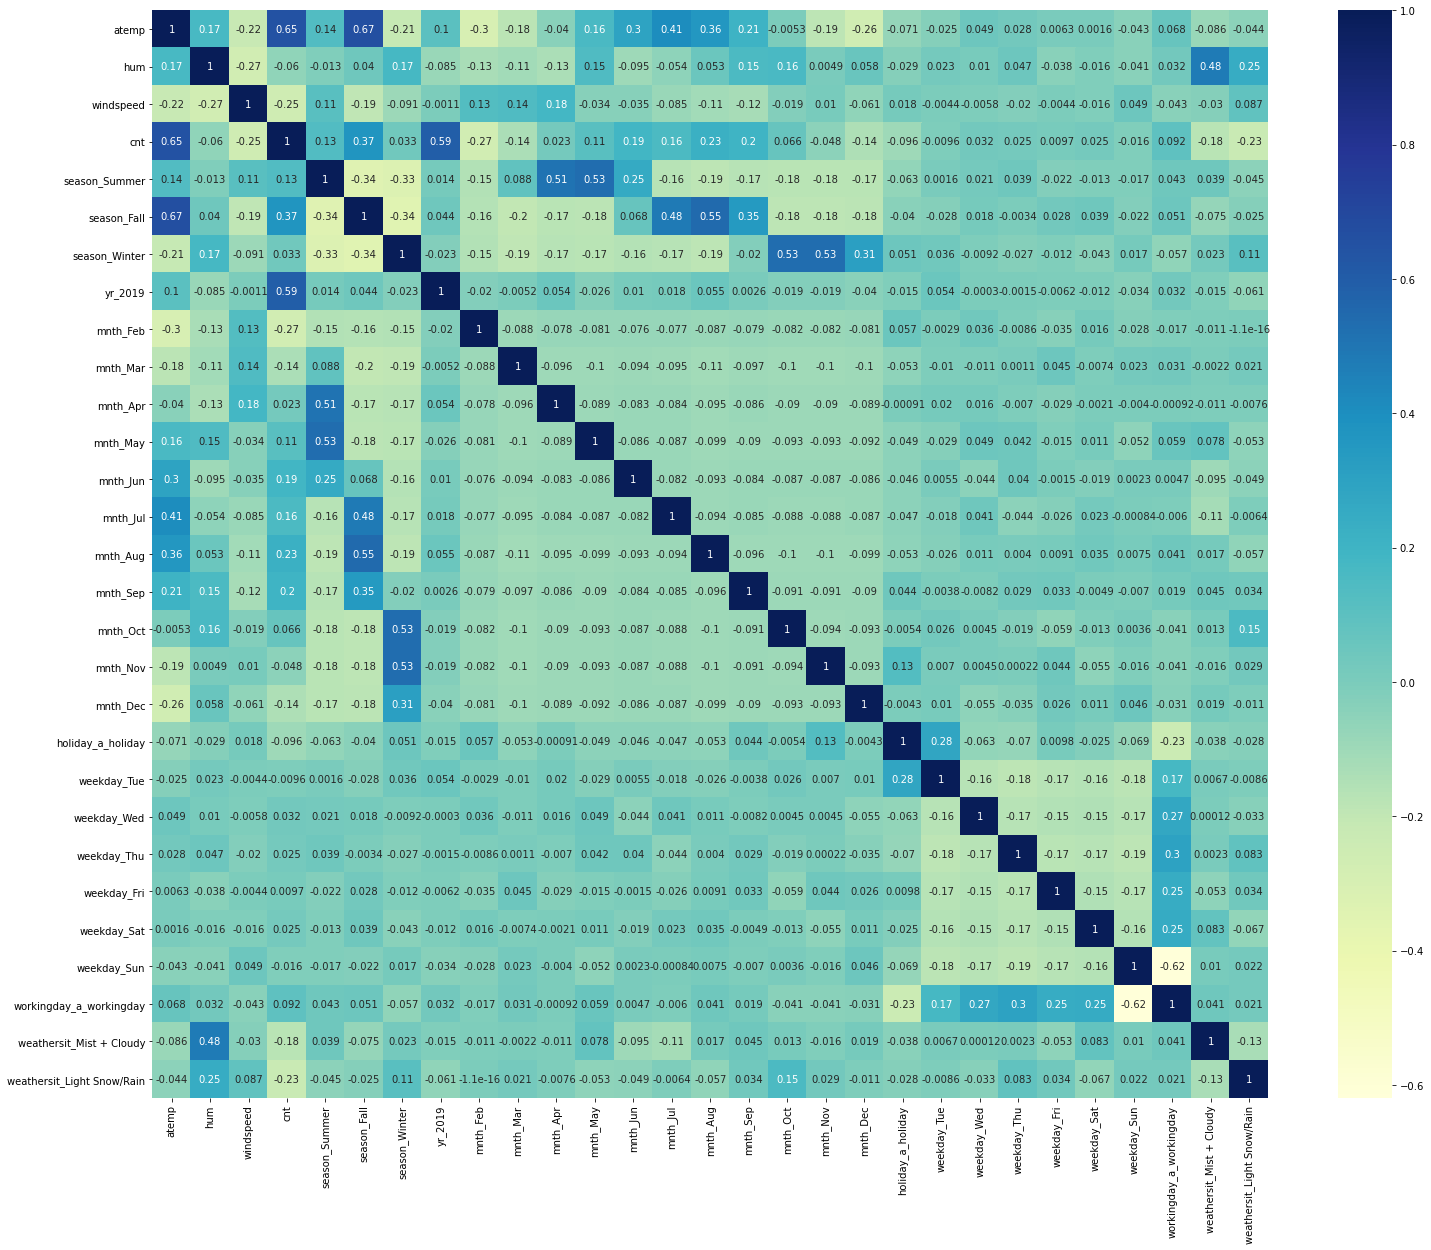

In [24]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

> ## **Data Modelling and Evaluation**

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

- #### Importing the Libraries Required for Modelling.

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', False, 7),
 ('windspeed', False, 6),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 3),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Jul', False, 4),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 8),
 ('mnth_Dec', False, 9),
 ('holiday_a_holiday', True, 1),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 11),
 ('weekday_Thu', False, 13),
 ('weekday_Fri', False, 14),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', True, 1),
 ('workingday_a_workingday', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('weathersit_Light Snow/Rain', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'season_Summer', 'season_Fall', 'season_Winter', 'yr_2019',
       'mnth_May', 'mnth_Jun', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct',
       'holiday_a_holiday', 'weekday_Sun', 'workingday_a_workingday',
       'weathersit_Mist + Cloudy', 'weathersit_Light Snow/Rain'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_Jul',
       'mnth_Nov', 'mnth_Dec', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu',
       'weekday_Fri', 'weekday_Sat'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [33]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [34]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.41e-180
Time:                        13:32:41   Log-Likelihood:                -269.45
No. Observations:                 510   AIC:                             570.9
Df Residuals:                     494   BIC:                             638.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`mnth_Jun` is insignificant in presence of other variables as its p-value is greater than 0.05; can be dropped

In [35]:
X_train_new = X_train_rfe.drop(["mnth_Jun"], axis = 1)

Rebuilding the model without `mnth_Jun`

In [36]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.52e-180
Time:                        13:32:41   Log-Likelihood:                -270.83
No. Observations:                 510   AIC:                             571.7
Df Residuals:                     495   BIC:                             635.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`mnth_May` is insignificant in presence of other variables as its p-value is greater than 0.05; can be dropped

In [37]:
X_train_new = X_train_new.drop(["mnth_May"], axis = 1)

Rebuilding the model without `mnth_May`

In [38]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.93e-181
Time:                        13:32:41   Log-Likelihood:                -271.85
No. Observations:                 510   AIC:                             571.7
Df Residuals:                     496   BIC:                             631.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`holiday_a_holiday` is insignificant in presence of other variables as its p-value is greater than 0.05; can be dropped

In [39]:
X_train_new = X_train_new.drop(["holiday_a_holiday"], axis = 1)

Rebuilding the model without `holiday_a_holiday`

In [40]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.03e-181
Time:                        13:32:41   Log-Likelihood:                -273.53
No. Observations:                 510   AIC:                             573.1
Df Residuals:                     497   BIC:                             628.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
X_train_new.columns

Index(['const', 'atemp', 'season_Summer', 'season_Fall', 'season_Winter',
       'yr_2019', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weekday_Sun',
       'workingday_a_workingday', 'weathersit_Mist + Cloudy',
       'weathersit_Light Snow/Rain'],
      dtype='object')

In [42]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [43]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_Fall,4.79
9,workingday_a_workingday,3.50
0,atemp,2.30
3,season_Winter,2.20
1,season_Summer,2.13
4,yr_2019,1.87
5,mnth_Aug,1.85
7,mnth_Oct,1.63
10,weathersit_Mist + Cloudy,1.58
8,weekday_Sun,1.56


Now as you can see, the VIFs and p-values both are within an acceptable range i.e. For all the variables VIF is under 5 and p-value is less than 0.05. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [44]:
y_train_count = lm.predict(X_train_lm)

In [45]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

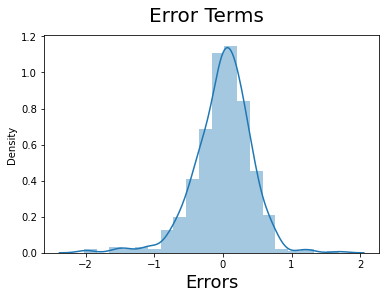

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- Let's check if the error terms are Independent and has constant variance (which is infact, one of the major assumptions of linear regression), let us plot the scatter plot of the error terms and see what it looks like.

Text(0, 0.5, 'Residual')

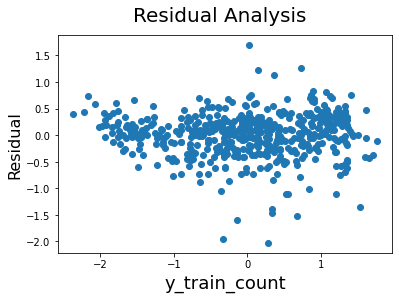

In [47]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_count,y_train - y_train_count)
fig.suptitle('Residual Analysis', fontsize=20)              # Plot heading 
plt.xlabel('y_train_count', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)                          # Y-label 

We can see from above plot error terms are independent and they have constant variance.

## Making Predictions
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

- #### Applying the scaling on the test sets

In [48]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

- #### Dividing into X_test and y_test

In [49]:
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [51]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [52]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
r = metrics.r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - r) * ((X_test_new.shape[0] - 1) / (X_test_new.shape[0] - X_test_new.shape[1] - 1)))
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Adjusted R-Squared:",adj_r2)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.17050370093299322
R score: 0.8192755308067894
Adjusted R-Squared: 0.8078149547116101
Mean Absolute Error: 0.3201988508880683


## Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

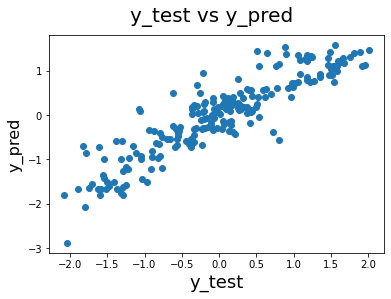

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## Final Model
- Adjusted R-squared for train data: **82.5 %**
- Adjusted R-squared for test data: **80.78 %**

We can see that the equation of our best fitted line is:

$ cnt = -1.0320 + 0.4529 \times atemp + 0.5602 \times season\_Summer + 0.2972 \times season\_Fall + 0.6633 \times season\_Winter + 1.0438 \times yr\_2019 + 0.2210 \times mnth\_Aug + 0.4875 \times mnth\_Sep + 0.1834 \times mnth\_Oct + 0.2839 \times weekday\_Sun + 0.2499 \times workingday\_a\_workingday - 0.3731 \times weathersit\_Mist + Cloudy - 1.3565 \times weathersit\_Light Snow/Rain $